In [846]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pathlib import Path
import sqlite3

In [847]:
sns.set(font_scale = 2,style ='whitegrid', rc={'figure.figsize':(20,7)})

In [848]:
df = pd.read_excel('C:/Users/Admin/Desktop/ANALYSE/sql/data_billionaires.xlsx')

In [849]:
df.shape

(2614, 30)

In [850]:
df.head()

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2001,A Jerrold Perenchio,151,United States,USA,3.0,self-made,executive,male,70.0,...,former chairman and CEO,1955.0,1.062180e+13,NaN,represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
1,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
2,2001,Abdul Al Rahman Al Jeraisy,336,Saudi Arabia,SAU,1.5,self-made,founder non-finance,male,NaN,...,founder,1956.0,1.830120e+11,NaN,NaN,NaN,http://www.jeraisy.com.sa/index.php/pages/rend...,NaN,NaN,NaN
3,2001,Abdul Aziz Al Ghurair,251,United Arab Emirates,ARE,1.9,inherited,inherited,male,47.0,...,relation,1960.0,1.030000e+11,NaN,inherited from father,NaN,NaN,NaN,NaN,NaN
4,1996,Abdul Aziz Al-Sulaiman,404,Saudi Arabia,SAU,1.0,self-made,self-made finance,male,0.0,...,founder,1968.0,1.577430e+11,NaN,NaN,NaN,http://www.arabianbusiness.com/arabian-busines...,NaN,NaN,NaN


In [851]:
df.isnull().sum()

year                          0
name                          0
rank                          0
citizenship                   0
countrycode                   0
networthusbillion             0
selfmade                     22
typeofwealth                 22
gender                       34
age                         185
industry                      1
IndustryAggregates            1
region                        0
north                         0
politicalconnection        2536
founder                       0
generationofinheritance       0
sector                       23
company                      38
companytype                  36
relationshiptocompany        46
foundingdate                 40
gdpcurrentus               1665
sourceofwealth              976
notes                      1424
notes2                     2417
source                       43
source_2                    471
source_3                   1839
source_4                   2591
dtype: int64

Since we have multiple columns with hundreds, if not thousands of NA values, it is necessary to determine how to replace this data.
Irrelevant columns include variables that include extraneous information like URLs.
Additionally, columns like 'political connection' and 'north' have very few relevant values and can be dropped entirely.

In [852]:
df = df.drop(columns=['notes', 'notes2','source',
       'source_2', 'source_3', 'source_4','politicalconnection','north'])

For data analysis it is important to retain as many row values as possible. That means that I want to avoid dropping entire columns unless I'm sure they're irrelevant to the overall analysis.
Therefore, I wanted to manually impute placeholder values to replace NAs and retain rows in the dataset.

In [853]:
df['age'].mean()

57.40386990531083

In [854]:
df['age'] = df['age'].fillna(57.4)

In [855]:
df[['selfmade', 'typeofwealth', 'gender','industry', 'IndustryAggregates', \
    'sector','company', 'companytype','relationshiptocompany','sourceofwealth']] = \
df[['selfmade', 'typeofwealth', 'gender','industry', 'IndustryAggregates','sector',\
    'company', 'companytype','relationshiptocompany','sourceofwealth']].fillna('no_info')

In [856]:
df[['foundingdate','gdpcurrentus']] = df[['foundingdate','gdpcurrentus']].fillna(0)
df[['foundingdate']] = df[['foundingdate']].astype(int)

In [857]:
df.rename(columns={'countrycode': 'country_code', 'networthusbillion': 'net_worth_US_billion', \
                   'typeofwealth': 'type_of_wealth', 'IndustryAggregates': 'industry_aggregates',  
                   'companytype': 'Company_type', 'relationshiptocompany': 'relationship_to_company',\
                   'foundingdate': 'founding_date','gdpcurrentus': 'GDP_current_US', 'sourceofwealth': 'source_of_wealth'},\
                    inplace=True)

In the  column 'sector'  the name  "Software" was written with both uppercase and lowercase letters. This could create issues for future analysis. Let's standardize the name to one format.

In [858]:
df.loc[df['sector']==' Software','sector']='software'

In [859]:
df.head()

,year,name,rank,citizenship,country_code,net_worth_US_billion,selfmade,type_of_wealth,gender,age,...,region,founder,generationofinheritance,sector,company,Company_type,relationship_to_company,founding_date,GDP_current_US,source_of_wealth
0,2001,A Jerrold Perenchio,151,United States,USA,3.0,self-made,executive,male,70.0,...,North America,0,0,media,Univision,aquired,former chairman and CEO,1955,1.062180e+13,no_info
1,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,North America,0,0,media,Univision,aquired,former chairman and CEO,1955,0.000000e+00,"television, Univision"
2,2001,Abdul Al Rahman Al Jeraisy,336,Saudi Arabia,SAU,1.5,self-made,founder non-finance,male,57.4,...,Middle East/North Africa,1,0,industrial goods,Jeraisy Group,new,founder,1956,1.830120e+11,no_info
3,2001,Abdul Aziz Al Ghurair,251,United Arab Emirates,ARE,1.9,inherited,inherited,male,47.0,...,Middle East/North Africa,0,inherited from father,industrial goods,Al-Ghurair Group,new,relation,1960,1.030000e+11,no_info
4,1996,Abdul Aziz Al-Sulaiman,404,Saudi Arabia,SAU,1.0,self-made,self-made finance,male,0.0,...,Middle East/North Africa,1,0,construction,Rolaco Trading and Contracting Company,new,founder,1968,1.577430e+11,no_info


The Path library from Python allows me to create a SQL Lite database that I can connect to with Pandas' 'to_sql' method.

In [860]:
Path('df.db').touch()
billion_conn = sqlite3.connect('df.db')
billion_c = billion_conn.cursor()

In [861]:
df.to_sql('data', billion_conn, index=False, if_exists='replace')


2614

In [862]:
billion_dat_lst = pd.read_sql(''' SELECT * FROM data LIMIT 5 ''', billion_conn)
billion_dat_lst

,year,name,rank,citizenship,country_code,net_worth_US_billion,selfmade,type_of_wealth,gender,age,...,region,founder,generationofinheritance,sector,company,Company_type,relationship_to_company,founding_date,GDP_current_US,source_of_wealth
0,2001,A Jerrold Perenchio,151,United States,USA,3.0,self-made,executive,male,70.0,...,North America,0,0,media,Univision,aquired,former chairman and CEO,1955,1.062180e+13,no_info
1,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,North America,0,0,media,Univision,aquired,former chairman and CEO,1955,0.000000e+00,"television, Univision"
2,2001,Abdul Al Rahman Al Jeraisy,336,Saudi Arabia,SAU,1.5,self-made,founder non-finance,male,57.4,...,Middle East/North Africa,1,0,industrial goods,Jeraisy Group,new,founder,1956,1.830120e+11,no_info
3,2001,Abdul Aziz Al Ghurair,251,United Arab Emirates,ARE,1.9,inherited,inherited,male,47.0,...,Middle East/North Africa,0,inherited from father,industrial goods,Al-Ghurair Group,new,relation,1960,1.030000e+11,no_info
4,1996,Abdul Aziz Al-Sulaiman,404,Saudi Arabia,SAU,1.0,self-made,self-made finance,male,0.0,...,Middle East/North Africa,1,0,construction,Rolaco Trading and Contracting Company,new,founder,1968,1.577430e+11,no_info


In [863]:
df_2014 = df[df['year']== 2014]

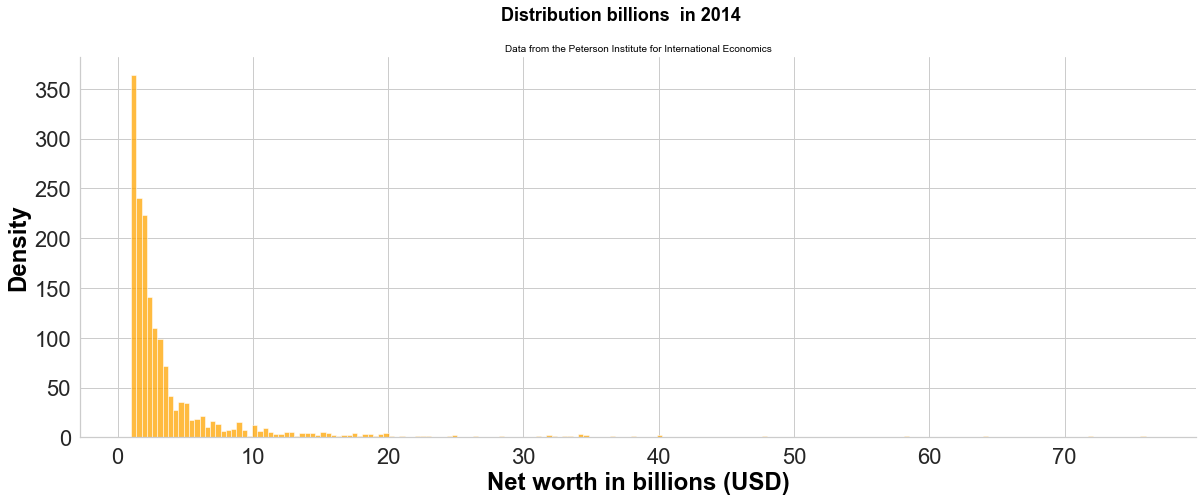

In [864]:
sns.histplot(df_2014['net_worth_US_billion'], color = 'orange')
plt.title('Data from the Peterson Institute for International Economics', color = 'black').set_fontsize(10)
plt.suptitle('Distribution billions  in 2014', weight='bold', color = 'black').set_fontsize(18)
plt.xlabel('Net worth in billions (USD)', weight = 'bold', color = 'black')
plt.ylabel('Density', weight = 'bold', color = 'black')
sns.despine()

The majority of net worth values in the dataset falls between 0 and 10 billion dollars.

In [865]:
top_ten = pd.read_sql(''' SELECT  name, net_worth_US_billion  FROM data
                     where  year = '2014' group by name order by net_worth_US_billion  desc limit 10  ''',billion_conn)

In [866]:
top_ten

,name,net_worth_US_billion
0,Bill Gates,76.0
1,Carlos Slim Helu,72.0
2,Amancio Ortega,64.0
3,Warren Buffett,58.2
4,Larry Ellison,48.0
5,David Koch,40.0
6,Charles Koch,40.0
7,Sheldon Adelson,38.0
8,Christy Walton,36.7
9,Jim Walton,34.7


In [867]:
top_ten['net_worth_US_billion'].min()

34.7

In [868]:
top_ten['net_worth_US_billion'].max()

76.0

However, for the world's richest people in 2014, the distribution extends from 35 to 76 billion dollars.

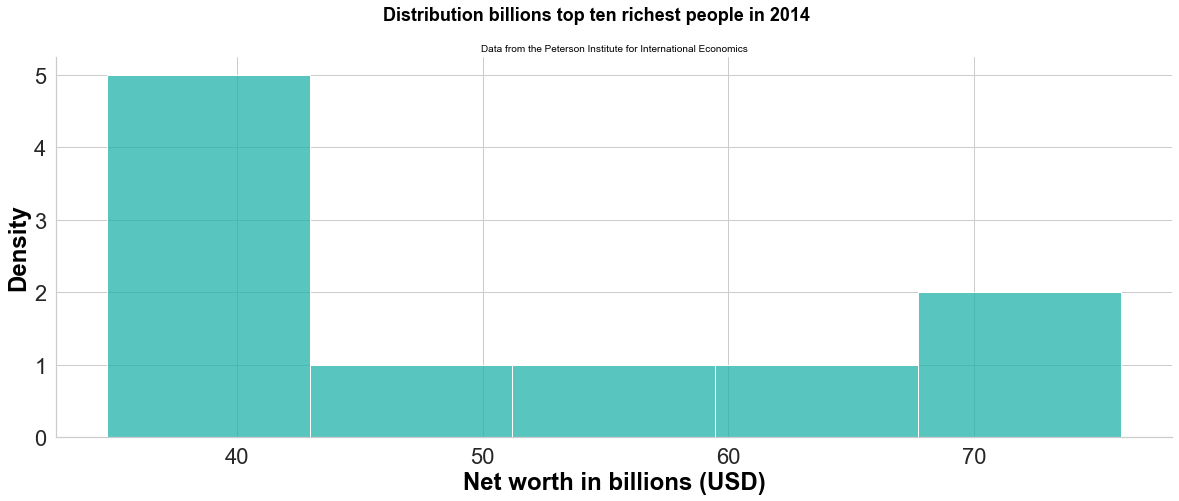

In [869]:
sns.histplot(top_ten['net_worth_US_billion'], color = 'lightseagreen')
plt.title('Data from the Peterson Institute for International Economics', color = 'black').set_fontsize(10)
plt.suptitle('Distribution billions top ten richest people in 2014', weight='bold', color = 'black').set_fontsize(18)
plt.xlabel('Net worth in billions (USD)', weight = 'bold', color = 'black')
plt.ylabel('Density', weight = 'bold', color = 'black')
sns.despine()

At the date of this report Bill Gates was the richest individual in the world. Amazon CEO Jeff Bezos has since usurped his title.
The top 10 richest individuals in the world only includes one woman, Christy Walton, Walmart heiress.

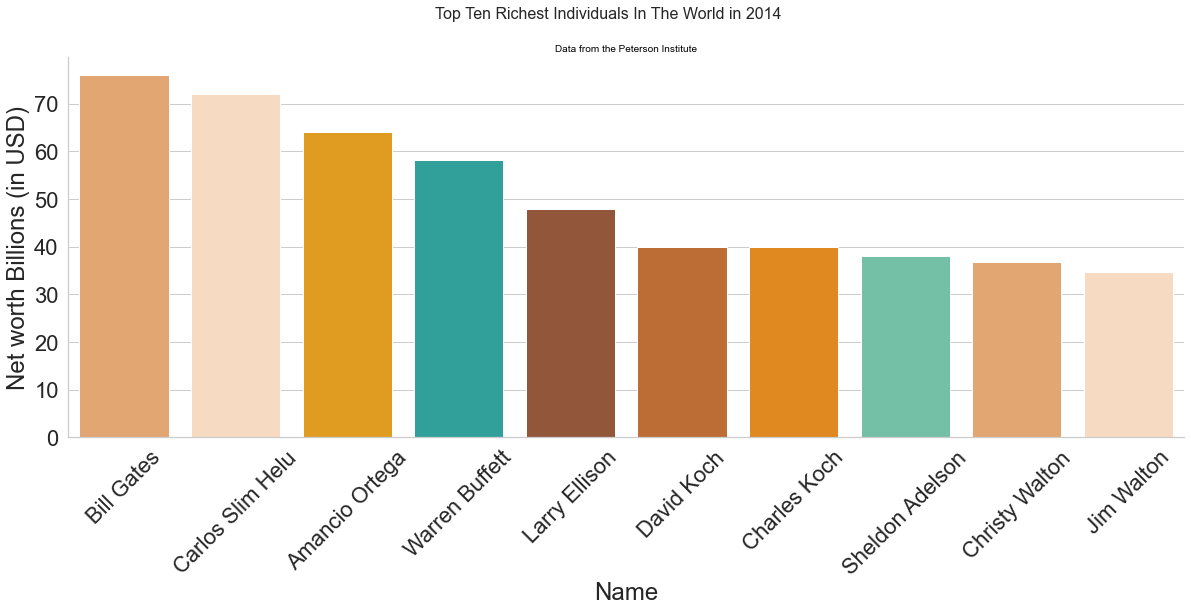

In [870]:
colors = ['sandybrown','peachpuff','orange','lightseagreen', 'sienna', 'chocolate', 'darkorange', 'mediumaquamarine']
plt.suptitle('Top Ten Richest Individuals In The World in 2014').set_fontsize(16)
plt.title('Data from the Peterson Institute', color = 'black').set_fontsize(10)
sns.barplot( x = 'name', y = 'net_worth_US_billion', data = top_ten,palette=colors)
plt.xlabel('Name')
plt.ylabel('Net worth Billions (in USD)' )
plt.xticks(rotation=45)
sns.despine()

In [871]:
younger_billionaires_2014 = pd.read_sql(''' SELECT name, net_worth_US_billion, selfmade FROM data
                        WHERE age < 30  and year = '2014' group by name order by net_worth_US_billion
                        DESC ''', billion_conn)

In [872]:
younger_billionaires_2014

,name,net_worth_US_billion,selfmade
0,Mark Zuckerberg,28.5,self-made
1,Dustin Moskovitz,6.8,self-made
2,"Anton Kathrein, Jr.",1.4,inherited
3,Perenna Kei,1.3,inherited


In [873]:
bins = [0, 30, 65, float('inf')]

labels = ['before 30', '30-65', 'more than 65']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [874]:
billionaires_30 = df[df['age_group']=='before 30'].groupby(['year','selfmade']).\
                       agg({'name':'count'}).rename(columns= {'name':'quantity'}).reset_index()

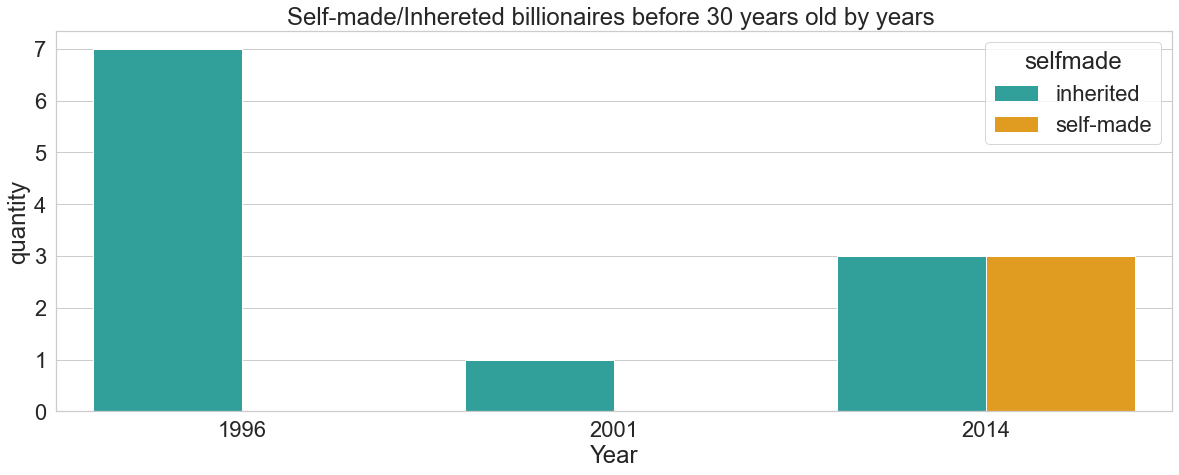

In [875]:

fig, ax = plt.subplots()
colors = ['lightseagreen','orange','peachpuff']

sns.barplot(x='year', y='quantity', hue='selfmade', data=billionaires_30,palette=colors, ax=ax)

ax.set_title('Self-made/Inhereted billionaires before 30 years old by years ')
ax.set_xlabel('Year')

plt.show()

In [876]:
billionaires_30_65 = df[df['age_group'] == '30-65'].groupby(['year','selfmade']).\
                       agg({'name':'count'}).rename(columns= {'name':'quantity'}).reset_index()

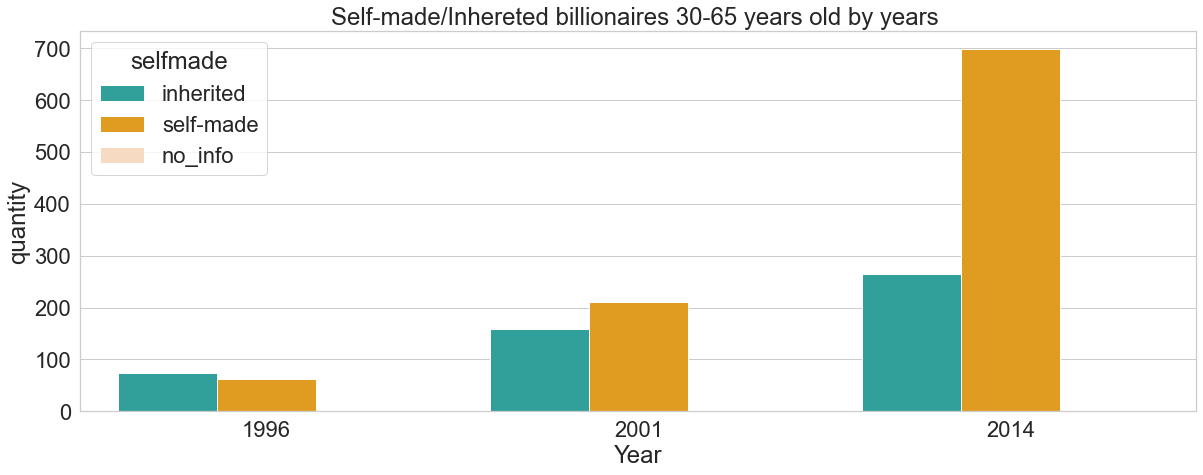

In [877]:
fig, ax = plt.subplots()
colors = ['lightseagreen','orange','peachpuff']

sns.barplot(x='year', y='quantity', hue='selfmade', data=billionaires_30_65,palette=colors, ax=ax)

ax.set_title('Self-made/Inhereted billionaires 30-65 years old by years ')
ax.set_xlabel('Year')

plt.show()

In [878]:
billionaires_65 = df[df['age_group'] == 'more than 65'].groupby(['year','selfmade']).\
                       agg({'name':'count'}).rename(columns= {'name':'quantity'}).reset_index()

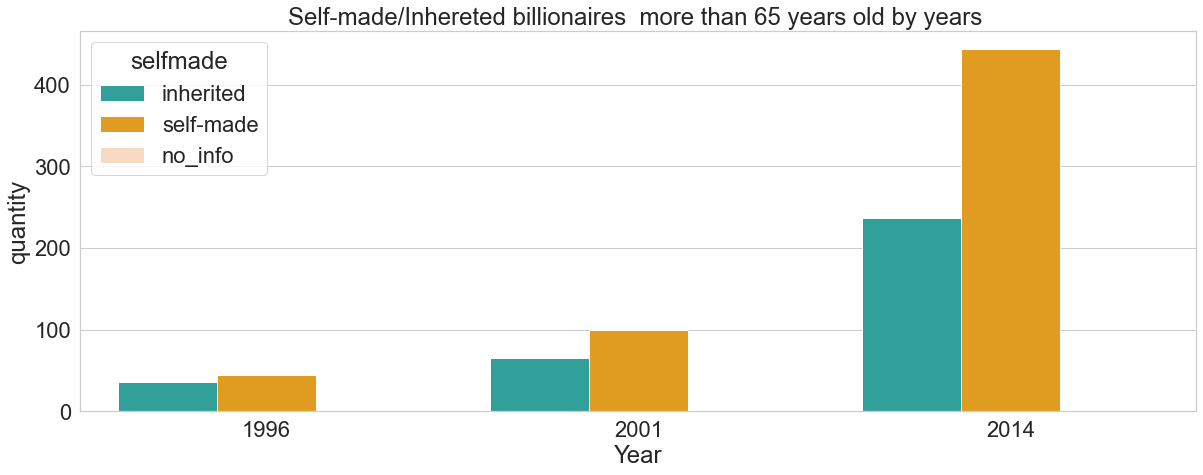

In [879]:
fig, ax = plt.subplots()
colors = ['lightseagreen','orange','peachpuff']

sns.barplot(x='year', y='quantity', hue='selfmade', data=billionaires_65,palette=colors, ax=ax)

ax.set_title('Self-made/Inhereted billionaires  more than 65 years old by years ')
ax.set_xlabel('Year')

plt.show()

We can see how the number of millionaires changed in different years and at different ages. In 1996, there were  younger millionaires (under 30), but they became millionaires due to inheritance. Their number decreased in 2001 and 2014, but in 2014, there were already self-made billionaires. Moreover, the number of middle-aged and over 65-year-old billionaires increased by more than 2 times from 2001 to 2014.

In [880]:
top_ten_popular_sector = pd.read_sql('''  SELECT sector,COUNT(company) AS company_count from data
                        where  year = '2014'
                        GROUP BY sector
                        ORDER BY company_count DESC
                        limit 10
                        
                        ''', billion_conn)

In [881]:
top_ten_popular_sector

,sector,company_count
0,real estate,122
1,retail,78
2,construction,60
3,pharmaceuticals,55
4,media,50
5,banking,47
6,hedge funds,44
7,software,40
8,oil,40
9,private equity,23


We can see the top 10 most popular and profitable sectors in 2014. We can also look at how the Software sector has changed from 1996 to 2014.

[Text(0.5, 1.0, 'Top 10  popular sector '),
 Text(0.5, 0, 'Sector'),
 Text(0, 0.5, 'Company count  ')]

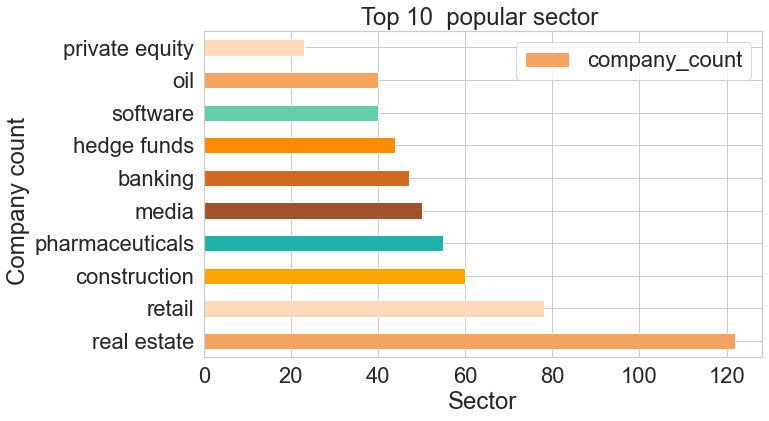

In [882]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['sandybrown','peachpuff','orange','lightseagreen', 'sienna', 'chocolate', 'darkorange', 'mediumaquamarine']
top_ten_popular_sector.plot(kind='barh', y="company_count", x="sector", ax=ax,color=colors)

ax.set(title='Top 10  popular sector ', xlabel='Sector', ylabel='Company count  ')

In [883]:
top_ten_profitable_sector = pd.read_sql(''' SELECT sector,sum(net_worth_US_billion) as total_net_worth_US_billion from data
                        where  year = '2014'
                        GROUP BY sector
                        ORDER BY total_net_worth_US_billion DESC
                        LIMIT 10''', billion_conn)

In [884]:
top_ten_profitable_sector

,sector,total_net_worth_US_billion
0,real estate,424.2
1,retail,295.3
2,media,232.6
3,software,188.6
4,hedge funds,164.3
5,technology,162.5
6,banking,150.6
7,pharmaceuticals,147.3
8,construction,143.8
9,oil,143.4


[Text(0.5, 1.0, 'Top 10  profitable sector '),
 Text(0.5, 0, 'Sector'),
 Text(0, 0.5, 'Total net worth US billions  ')]

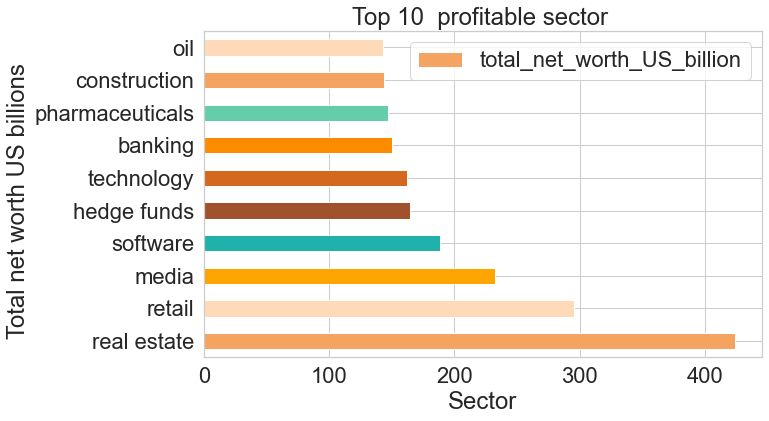

In [885]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['sandybrown','peachpuff','orange','lightseagreen', 'sienna', 'chocolate', 'darkorange', 'mediumaquamarine']
top_ten_profitable_sector.plot(kind='barh', y="total_net_worth_US_billion", x="sector", ax=ax,color=colors)

ax.set(title='Top 10  profitable sector ', xlabel='Sector', ylabel='Total net worth US billions  ')

In [886]:
software_sector_by_years  = pd.read_sql(''' SELECT year, count(company) as count_companies,sum(net_worth_US_billion)
                            as total_net_worth_US_billion from data
                            where  sector = 'software'
                            GROUP BY year ''', billion_conn)

In [887]:
software_sector_by_years

,year,count_companies,total_net_worth_US_billion
0,1996,8,30.1
1,2001,22,109.5
2,2014,40,188.6


In [888]:
female_billion = pd.read_sql(''' SELECT count (gender) as count_female,year, 
                                sum(net_worth_US_billion) as total_net_worth_US_billion FROM data
                                WHERE gender = 'female' 
                                GROUP BY year
                         
                                ''', billion_conn)

In [889]:
female_billion

,count_female,year,total_net_worth_US_billion
0,31,1996,74.1
1,38,2001,171.2
2,180,2014,705.7


In [890]:
male_billion = pd.read_sql(''' SELECT count (gender) as count_male,year, 
                                sum(net_worth_US_billion) as total_net_worth_US_billion FROM data
                                WHERE gender = 'male'
                                GROUP BY year
                         
                                ''', billion_conn)

In [891]:
male_billion 

,count_male,year,total_net_worth_US_billion
0,357,1996,883.6
1,498,2001,1555.0
2,1473,2014,5748.7


In [892]:
male_female_billion = pd.read_sql(''' SELECT female.year ,female.count_female, 
                                      female.total_net_worth_US_billion as female_total_net_worth_US_billion,
                                      male.count_male, male.total_net_worth_US_billion as male_total_net_worth_US_billion
                                      FROM 
                                      (SELECT count(gender) as count_female, year, 
                                       sum(net_worth_US_billion) as total_net_worth_US_billion FROM data 
                                       WHERE gender = 'female' 
                                       GROUP BY year) as female
                                       JOIN 
                                      (SELECT count(gender) as count_male, year, 
                                      sum(net_worth_US_billion) as total_net_worth_US_billion FROM data 
                                      WHERE gender = 'male' 
                                      GROUP BY year) as male
                                      ON female.year = male.year
                         
                                      ''', billion_conn)

In [893]:
male_female_billion

,year,count_female,female_total_net_worth_US_billion,count_male,male_total_net_worth_US_billion
0,1996,31,74.1,357,883.6
1,2001,38,171.2,498,1555.0
2,2014,180,705.7,1473,5748.7


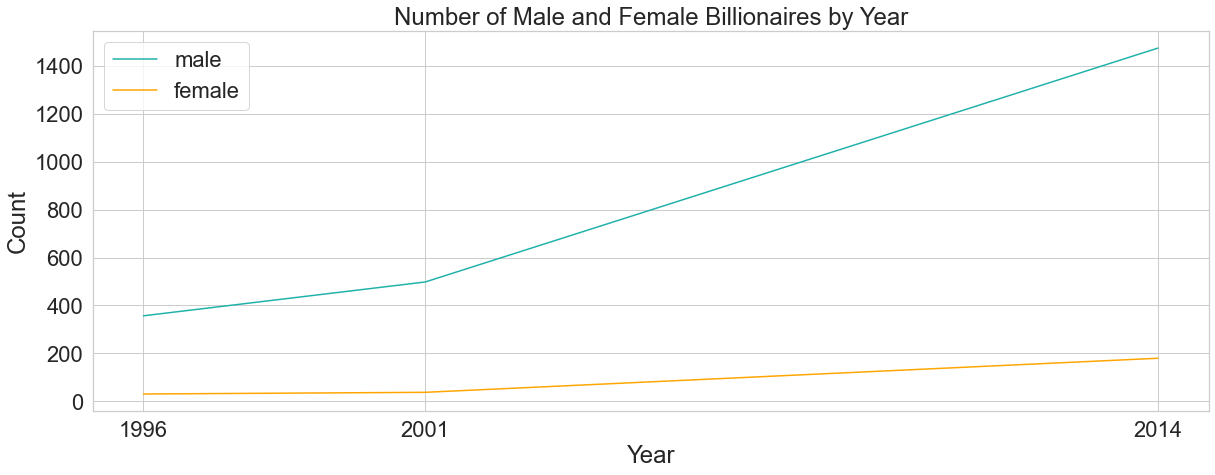

In [894]:

sns.lineplot(data=male_female_billion, x='year', y='count_male', label='male',color='lightseagreen')
sns.lineplot(data=male_female_billion, x='year', y='count_female', label='female',color='orange')
plt.xticks([1996, 2001, 2014])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Male and Female Billionaires by Year')
plt.show()

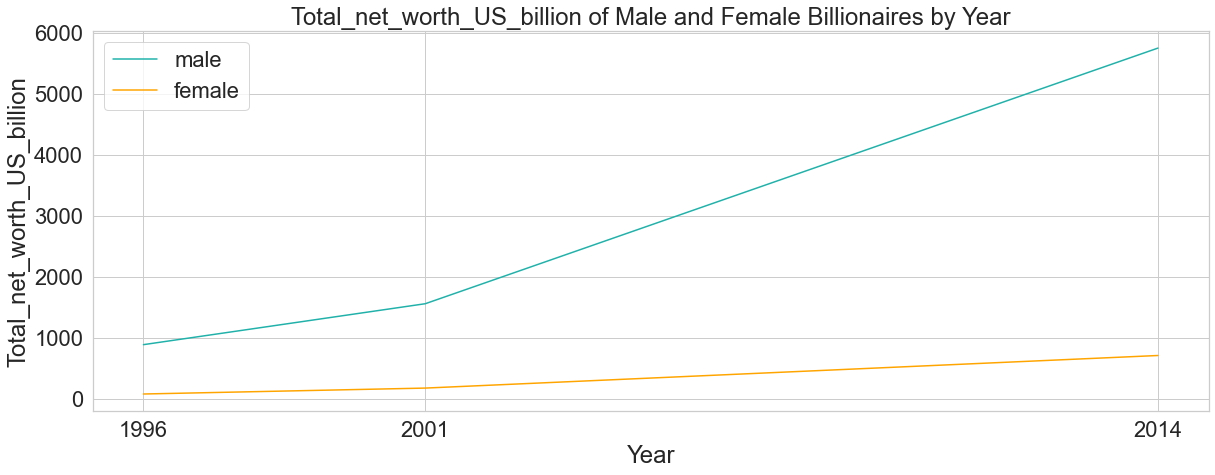

In [895]:
sns.lineplot(data=male_female_billion, x='year', y='male_total_net_worth_US_billion', label='male',color='lightseagreen')
sns.lineplot(data=male_female_billion, x='year', y='female_total_net_worth_US_billion', label='female',color='orange')
plt.xticks([1996, 2001, 2014])
plt.xlabel('Year')
plt.ylabel('Total_net_worth_US_billion')
plt.title('Total_net_worth_US_billion of Male and Female Billionaires by Year')
plt.show()

In [896]:
top_10_women_billionaires_2014 = pd.read_sql(''' SELECT name,sector, net_worth_US_billion
                                FROM data
                                WHERE gender = 'female' and year = '2014'
                                order by net_worth_US_billion desc
                                limit 10
                         
                                ''', billion_conn)

In [897]:
top_10_women_billionaires_2014

,name,sector,net_worth_US_billion
0,Christy Walton,retail,36.7
1,Liliane Bettencourt,cosmetics,34.5
2,Alice Walton,retail,34.3
3,Jacqueline Mars,candy,20.0
4,Gina Rinehart,mining,17.7
5,Susanne Klatten,cars,17.4
6,Abigail Johnson,investment banking,17.3
7,Anne Cox Chambers,media,15.5
8,Iris Fontbona,mining,15.5
9,Laurene Powell Jobs,technology,14.0


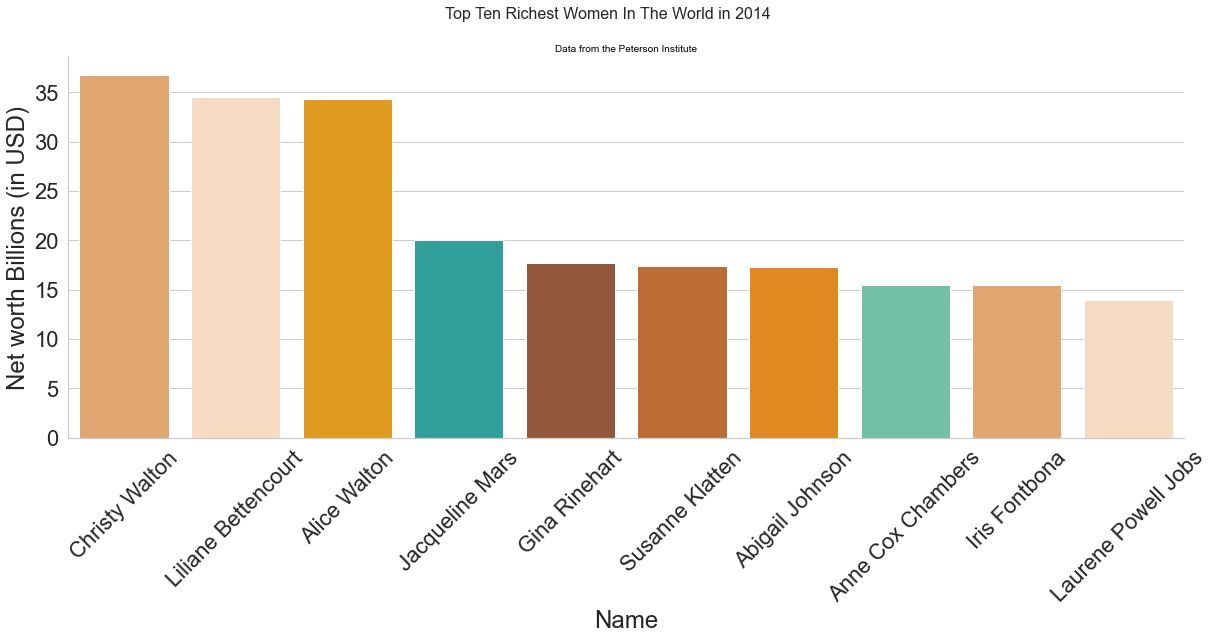

In [898]:
colors = ['sandybrown','peachpuff','orange','lightseagreen', 'sienna', 'chocolate', 'darkorange', 'mediumaquamarine']
plt.suptitle('Top Ten Richest Women In The World in 2014').set_fontsize(16)
plt.title('Data from the Peterson Institute', color = 'black').set_fontsize(10)
sns.barplot( x = 'name', y = 'net_worth_US_billion', data = top_10_women_billionaires_2014,palette=colors)
plt.xlabel('Name')
plt.ylabel('Net worth Billions (in USD)' )
plt.xticks(rotation=45)
sns.despine()

From the analysis, it can be seen that the number of female billionaires has increased almost sixfold compared to the years 1996 and 2014. The number of male millionaires exceeds the number of female millionaires by tens of times, and their income is correspondingly much higher. Additionally, it is possible to observe the top 10 richest women in the world in 2014.

In [900]:
 top_7_regions_2014 = pd.read_sql(''' SELECT region, sum(net_worth_US_billion) as total_US_billions, 
                                count('name') as count_billionaires 
                                FROM data
                                WHERE year =  '2014'
                                group by region 
                                order by sum(net_worth_US_billion) desc
                               
                         
                                ''', billion_conn)

In [901]:
 top_7_regions_2014

,region,total_US_billions,count_billionaires
0,North America,2530.4,562
1,Europe,1953.0,470
2,East Asia,1054.3,351
3,Latin America,440.4,114
4,Middle East/North Africa,205.9,78
5,South Asia,202.2,62
6,Sub-Saharan Africa,68.2,16


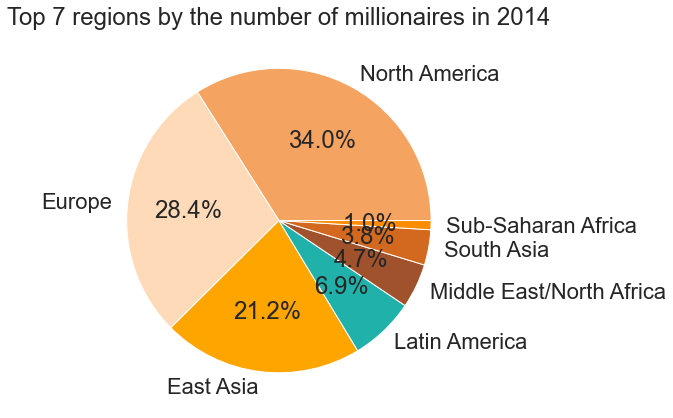

In [902]:
labels =  top_7_regions_2014.region.tolist()
values = top_7_regions_2014.count_billionaires.tolist()

fig, ax = plt.subplots(figsize=(7, 7))
my_colors = ['sandybrown','peachpuff','orange','lightseagreen', 'sienna', 'chocolate', 'darkorange', 'mediumaquamarine']
ax.pie(values, labels=labels, autopct='%1.1f%%',colors=my_colors)
ax.set_title('Top 7 regions by the number of millionaires in 2014')

plt.show()

The top three regions in terms of the number of billionaires is headed by North America,Europe,East Asia.

Let's take a look at the age distribution in the Forbes ranking in 2014. It's evident that only one person under the age of 30 made it to Forbes, and that's none other than Mark Zuckerberg, who is known to us.

In [904]:
age_group_forbes = df[(df['year']==2014)& (df['rank']<=100)].groupby('age_group').agg({'rank':'count'})

In [905]:
age_group_forbes

,rank
age_group,
before 30,1
30-65,47
more than 65,53


Now let's take a closer look at all the participants. Visually, it's noticeable that the main concentration of Forbes participants is after the age of 50.

In [906]:
 ages_forbes = pd.read_sql(''' SELECT  name,age, rank,gender 
                                FROM data
                                WHERE year =  '2014' and RANK <= 100
                                group by age,gender 
                                order by rank
                               
                         
                                ''', billion_conn)

In [907]:
 ages_forbes.head(10)

,name,age,rank,gender
0,Bill Gates,58.0,1,male
1,Carlos Slim Helu,74.0,2,male
2,Amancio Ortega,77.0,3,male
3,David Koch,73.0,6,male
4,Sheldon Adelson,80.0,8,male
5,Christy Walton,59.0,9,female
6,Jim Walton,66.0,10,male
7,Liliane Bettencourt,91.0,11,female
8,Alice Walton,64.0,13,female
9,Bernard Arnault,64.0,15,male


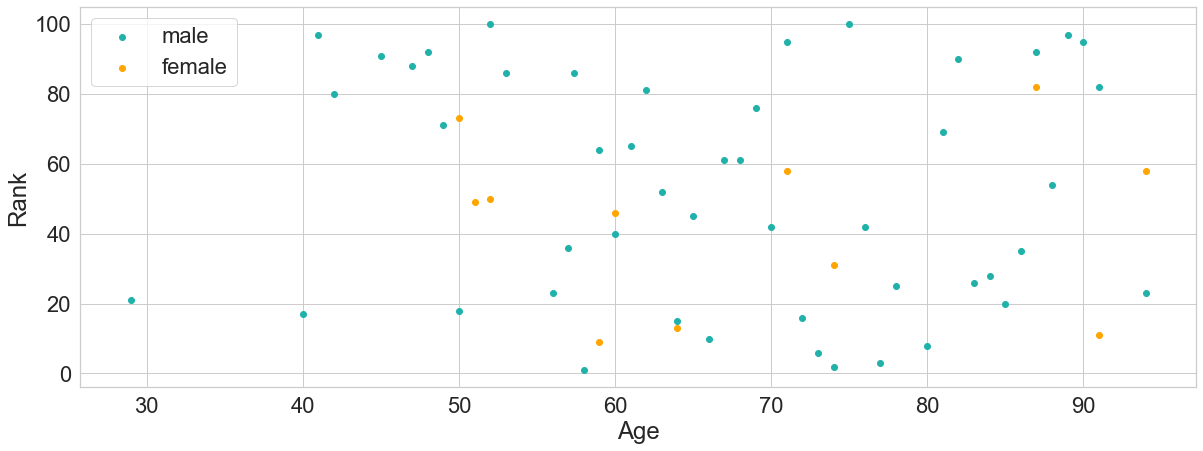

In [908]:

df_subset =  ages_forbes[['rank', 'age', 'gender']]


color_map = {'male': 'lightseagreen', 'female': 'orange'}

for gender in df_subset['gender'].unique():
    plt.scatter(df_subset[df_subset['gender'] == gender]['age'],
                df_subset[df_subset['gender'] == gender]['rank'],
                c=color_map[gender], label=gender)

plt.xlabel('Age')
plt.ylabel('Rank')

plt.legend()

plt.show()
